In [1]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import time
import methylprep
import methylcheck

In [2]:
%load_ext autoreload
%autoreload 2
from diff_meth_pos import diff_meth_pos, volcano_plot, manhattan_plot

In [3]:
##Install joblib module for parallelization
#import sys
#!conda install --yes --prefix {sys.prefix} joblib

In [4]:
# load a processed dataset and the phenotype list per sample.
# in CLI I ran `python -m methylprep process -d GSE69852_copy --betas --m_value to make these files.
#betas = pd.read_pickle('GSE69852_beta_values.pkl')
m_values = pd.read_pickle('GSE69852_m_values.pkl')
#betas.head()

In [5]:
#m_values.head()

## Testing logistic regression

In [6]:
##Create a logistic regression dataset using strings that will later be converted to zeros and ones
test_pheno_data = ["fetal","fetal","fetal","adult","adult","adult"]

In [7]:
test_M_values_T = m_values.transpose()
test_M_values_T

IlmnID,cg00035864,cg00061679,cg00063477,cg00121626,cg00223952,cg00243321,cg00271873,cg00272582,cg00308367,cg00311963,...,cg27572240,cg27576692,cg27603882,cg27604249,cg27610821,cg27614706,cg27619353,cg27620176,cg27647370,cg27652464
9247377093_R02C01,-1.657558,-0.396044,4.145929,-0.077822,-4.422725,1.428067,0.887213,-4.277830,3.444005,-0.069623,...,-5.723271,4.989842,-5.625227,2.630148,1.878921,4.999150,-2.224928,5.723168,5.544820,-4.371885
9247377093_R03C01,-1.272171,-0.585133,4.040560,-0.819236,-4.566209,1.650368,-0.130788,-4.179360,3.519842,0.041774,...,-5.781331,5.496960,-5.629285,2.870655,1.898206,5.135388,-2.098986,5.976650,4.862443,-4.761151
9247377093_R06C02,-1.068828,-0.229694,4.415733,-1.005097,-4.630842,1.485471,-0.410473,-3.654502,3.541137,-0.293482,...,-5.740904,5.840322,-5.795193,3.462553,2.273422,4.845416,-2.198372,5.820837,5.923393,-4.222713
9247377085_R04C02,-1.134419,0.172425,4.186749,-1.002444,-5.443880,0.583537,1.346416,-4.212176,3.414862,0.007094,...,-5.810003,3.203422,-5.570827,1.337832,-2.171884,4.452098,-0.996283,5.720355,2.831669,-4.534927
9247377093_R05C01,-1.635230,0.160366,4.071644,-0.541178,-5.146184,0.754072,1.649216,-4.114014,3.273894,0.001541,...,-5.900220,3.536042,-5.749431,1.386635,-1.525328,4.256825,-1.127194,5.795570,2.736498,-4.738488
9247377093_R02C02,-2.339952,0.319934,4.262602,-1.106664,-5.433991,0.950332,1.703134,-4.199340,3.109885,-0.353469,...,-5.713091,3.795702,-5.495856,1.278621,-0.966895,4.292308,-1.357735,5.718294,2.757395,-5.130338


In [23]:
##Run a logistic regression on the methylation data, first 30000 probes only here 
test_results = diff_meth_pos(test_M_values_T.sample(30000, axis=1), #.iloc[:,64000:67000],
                                  test_pheno_data,
                                  regression_method="logistic")

All samples with the phenotype (adult) were assigned a value of 0 and all samples with the phenotype (fetal) were assigned a value of 1 for the logistic regression analysis.



1786 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
28 probes failed the logistic regression analysis due to encountering a LinAlgError: Singular matrix and could not be included in the final results.
Probes with LinAlgError:
cg11365072
cg22708738
cg01184449
cg11311332
cg11596009
cg16032841
cg27154941
cg26403223
cg01439078
cg10237252
cg01243823
cg27130176
cg09933355
cg03939719
cg00381684
cg01803679
cg04428453
cg02396116
cg01485548
cg08531489
cg04379041
cg03325664
cg17511968
cg00734629
cg17054691
cg06352750
cg01831454
cg04312620


## Testing Manhattan plot visualizations

Total probes to plot: 26422
0 CH-01 2554
1 CH-02 1862
2 CH-03 1335
3 CH-04 1138
4 CH-05 1291
5 CH-06 1965
6 CH-07 1617
7 CH-08 1084
8 CH-09 549
9 CH-10 1317
10 CH-11 1514
11 CH-12 1355
12 CH-13 654
13 CH-14 877
14 CH-15 864
15 CH-16 1189
16 CH-17 1554
17 CH-18 355
18 CH-19 1420
19 CH-20 542
20 CH-21 250
21 CH-22 465
22 CH-X 644
23 CH-Y 27


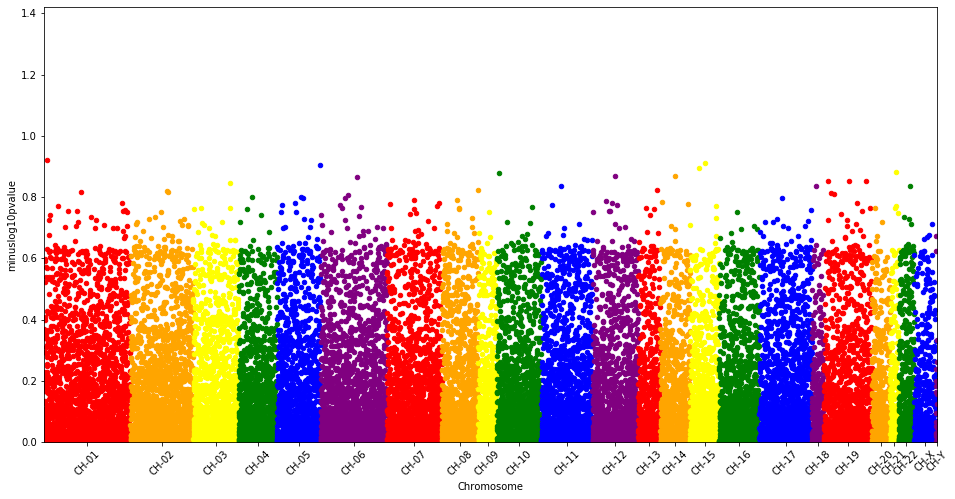

In [44]:
manhattan_plot(test_results)

In [34]:
""" pvalues: diff bw the two phenotype labels (A vs B difference sig)
most p-values in the demo data are not near or below 0.05.
That means those probes / locations are not useful in separating the two phenotypes
"""
interesting_probes = test_results[test_results['PValue'] <= 0.13]
interesting_probes

,Coefficient,StandardError,PValue,95%CI_lower,95%CI_upper,FDR_QValue,minuslog10pvalue,chromosome,ind
cg02067946,-6.648725,4.329956,0.124657,-15.135282,1.837832,0.999999,0.904285,CH-5,850
cg26397662,-1.782119,1.154425,0.122654,-4.044750,0.480512,0.999999,0.911318,CH-15,6434
cg02423618,-6.000645,3.939373,0.127697,-13.721674,1.720384,0.999999,0.893821,CH-15,6866
cg16558208,-1.625694,1.045875,0.120092,-3.675571,0.424184,0.999999,0.920484,CH-1,19601


## Testing linear regression

In [ ]:
##Create a linear regression dataset using strings that will be coerced to numbers (adult ages are estimates, not exact)
test_pheno_data2 = ["0","0","0","52","54","57"]

In [ ]:
##Run a linear regression on the methylation data
test_results2 = diff_meth_pos(test_M_values_T.iloc[:,:10000],
                              test_pheno_data2,
                              regression_method="linear")

In [ ]:
interesting_probes = test_results[test_results['PValue'] <= 0.05]
interesting_probes.index

## Testing Volcano plot visualizations

In [ ]:
volcano_plot(test_results2)

## Testing Manhattan plot visualizations

In [ ]:
ignore = """
testing volcano plot code inline 

import matplotlib.pyplot as plt
test_results.FDR_QValue[0]
cutoff = 0.05   ##choose the significance cutoff for coloring different points

colors = []
for i in range(len(test_results.FDR_QValue)):
    if test_results.FDR_QValue[i] < cutoff:
        if test_results.Coefficient[i] > 0:
            colors.append("red")
        else:
            colors.append("blue")
    else:
        colors.append("silver")
plt.scatter(test_results.Coefficient,-np.log10(test_results.FDR_QValue),c=colors)
plt.ylabel("-log10 (FDR Adjusted Q Value)")
plt.xlabel("Beta")
plt.axhline(y=-np.log10(cutoff), color="gray", linestyle='--')        
"""

In [ ]:
'''
##Copy of manifest-reading code from methpype
def readManifest(array):
    """Return Illumina manifest for array type
    Parameters
    ----------
    array: str
        String specifying the type of Illumina Methylation Array
    Returns
    -------
    manifest: dataframe
        Dataframe containing Illumina Human Methylation Array manifest
    """
    downloadManifest(array)
    if array == 'CustomArray':
        manifest = pd.read_csv(os.path.expanduser(
            "~/.methpype_manifest_files/CombinedManifestEPIC.manifest.CoreColumns.csv.gz"))
        # TEMPORARY - Remove missing probes
        manifest = manifest[manifest['AddressA_ID'] != 9614306]
        manifest = manifest[manifest['AddressA_ID'] != 9637526]
        manifest = manifest[manifest['AddressA_ID'] != 3680876]
        manifest = manifest[manifest['AddressB_ID'] != 60646183]
    elif array == 'IlluminaHumanMethylation450k':
        #manifest = pd.read_csv(os.path.expanduser("~/.methpype_manifest_files/HumanMethylation450_15017482_v1-2.CoreColumns.csv.gz"))
        manifest = pd.read_csv("~/HumanMethylation450_15017482_v1-2.csv")
    elif array == 'IlluminaHumanMethylationEPIC':
        manifest = pd.read_csv(os.path.expanduser(
            "~/.methpype_manifest_files/MethylationEPIC_v-1-0_B4.CoreColumns.csv.gz"))
    manifest = manifest.rename({'AddressA_ID': 'AddressA', 'AddressB_ID': 'AddressB', 'Infinium_Design_Type': 'Type',
                                'Color_Channel': 'Color', 'IlmnID': 'CtrlAddress', 'Name': 'Name'}, axis='columns')
    manifest.dropna(how='all', inplace=True)
    manifest = flagProbeTypes(manifest)
    # CURRENTLY UNUSED CODE
    # KEEP FOR FUTURE ITERATION WHERE PROBE SEQUENCES CAN BE MAPPED BACK
    # # determine nCpGs
    # nCpGs = {}
    # for name,A,B,T in zip(manifest['Name'],manifest['ProbeSeqA'],manifest['ProbeSeqB'],manifest['Type']):
    #   if T == 'I':
    #       nCpGs[name] = int(B.count("CG")-1)
    #   elif T == 'II':
    #       nCpGs[name] = int(A.count('R'))
    #   else:
    #       nCpGs[name] = int(0)
    # # add to dataframe
    # manifest['nCpG'] = manifest['Name'].map(nCpGs)
    # determine types
    return manifest
'''

In [ ]:
'''
##Copy of genome mapping function from methpype
def mapToGenome(df, rgset):
    """Maps dataframe to genome locations
    Parameters
    ----------
    df: dataframe
            Dataframe containing methylation, unmethylation, M or Beta
            values for each sample at each site
    rgset: rg channel set instance
            RG channel set instance related to provided df
    Returns
    -------
    df: dataframe
            Dataframe containing the original values with the addition
            of genomic locations for each site
    """
    if 'Name' in df.columns:
        mani = rgset.manifest
        chromosomes = dict(
            zip(list(mani['Name'].values), list(mani['CHR'].values)))
        strands = dict(
            zip(list(mani['Name'].values), list(mani['Strand'].values)))
        build = dict(zip(list(mani['Name'].values),
                         list(mani['Genome_Build'].values)))
        mapinfo = dict(
            zip(list(mani['Name'].values), list(mani['MAPINFO'].values)))
        df['Chr'] = df['Name'].map(chromosomes)
        df['Strand'] = df['Name'].map(strands)
        df['GenomeBuild'] = df['Name'].map(build)
        df['MapInfo'] = df['Name'].map(mapinfo)
        return df
    else:
        print("No 'Name' column in dataframe.")
        return
'''

# Scratch space for testing individual commands on toy data

In [ ]:
test_M_data = [0.2,0.3,0.25,0.7,0.85,0.6]
test_pheno_data = [0,0,0,1,1,1]

In [ ]:
logit = sm.Logit(test_pheno_data,test_M_data)

In [ ]:
results  = logit.fit()

In [ ]:
results.summary()

In [ ]:
ci = results.conf_int(0.05)
ci[0][1]

In [ ]:
test_betas.sort_values("GSM1711360_9247377093_R02C01",axis=0)

In [ ]:
test_contpheno_data = [1.2,1.8,5.2,3.5,4.2,7.9]

In [ ]:
contfit = sm.OLS(test_M_data,test_contpheno_data)

In [ ]:
contresults = contfit.fit()

In [ ]:
contresults.summary()

In [ ]:
contresults.params

In [ ]:
contresults.bse

In [ ]:
contresults.pvalues

In [ ]:
CI = contresults.conf_int(0.05)

In [ ]:
CI[0][0]

In [ ]:
test_betas.loc[test_betas["GSM1711360_9247377093_R02C01"]<0.05]

In [ ]:
set(test_M_values.dtypes)

In [ ]:
np.issubdtype(test_M_values,np.number)

In [ ]:
row_index = ["probe"]
stat_cols = ["Coefficient","95%CI_lower","95%CI_upper","StandardError","PValue","FDR_QValue"]
probe_stats = pd.DataFrame(index=row_index,columns=stat_cols)
probe_stats = probe_stats.fillna(np.nan)
probe_stats

In [ ]:
##Copied from earlier logistic toy example
results.summary()

In [ ]:
probe_coef = results.params
probe_CI = results.conf_int(0.05)   ##returns the lower and upper bounds for the coefficient's 95% confidence interval
probe_SE = results.bse
probe_pval = results.pvalues

In [ ]:
probe_stats.loc[row_index[0]] = {"Coefficient":probe_coef[0],"95%CI_lower":probe_CI[0][0],"95%CI_upper":probe_CI[0][1],"StandardError":probe_SE[0],"PValue":probe_pval[0]}
probe_stats

In [ ]:
probe_stats

In [ ]:
import multiprocessing as mp

In [ ]:
mp.cpu_count()

In [ ]:
test_series = pd.Series({"A":1,"B":2,"C":3},name="firstRow")

In [ ]:
test_series

In [ ]:
from joblib import cpu_count

In [ ]:
cpu_count()

In [ ]:
small_test = test_M_values_T.iloc[:,:10]
small_test

In [ ]:
for i in small_test:
    print(small_test[i])

In [ ]:
small_test.index[:3]

In [ ]:
small_test = small_test.drop(index=small_test.index[:3])

In [ ]:
small_test